In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/MATF-istrazivanje-podataka-1/2023_Data_Mining_Chess_Dataset/main/data/games.csv')

# Preprocesiranje

## Nedostajuce vrednosti

In [ ]:
data.isna().any().any() #proveravamo ima li nedostajucih vrednosti 

False

In [ ]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
################OVO OBRISI. OVO JE ELIMINACIJA REMIJA #######################
indexes=data[data['winner']=='draw'].index
data.drop(indexes,inplace=True)
######################################################################
data.winner.unique()

array(['white', 'black'], dtype=object)

## Duplirane vrednosti

In [ ]:
data.columns
data.drop_duplicates(subset=['id'],inplace=True)
data.shape

(19113, 16)

Obrisali smo sve visetruka ponavljanja u koloni 'id' jer ne smeju postojati dve partije sa istim id-jem.

## Oslobadjanje nepotrebnih atributa

In [ ]:
potezi=data.moves
data_dropped=data.drop(columns=['white_id','black_id','id','moves','created_at','last_move_at'])

array(['outoftime', 'resign', 'mate'], dtype=object)

In [ ]:
data_dropped.drop(columns=['opening_name'],inplace=True)

In [ ]:
data_dropped.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,D10,5
1,True,16,resign,black,5+10,1322,1261,B00,4
2,True,61,mate,white,5+10,1496,1500,C20,3
3,True,61,mate,white,20+0,1439,1454,D02,3
4,True,95,mate,white,30+3,1523,1469,C41,5


In [ ]:
print(data_dropped.victory_status.unique())
print(data_dropped.rated.unique())
print(data_dropped.winner.unique())

['outoftime' 'resign' 'mate']
[False  True]
['white' 'black']


U atributima koji su pregledani u celiji iznad, nema nepredvidjenih vrednosti

In [ ]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           19113 non-null  bool  
 1   turns           19113 non-null  int64 
 2   victory_status  19113 non-null  object
 3   winner          19113 non-null  object
 4   increment_code  19113 non-null  object
 5   white_rating    19113 non-null  int64 
 6   black_rating    19113 non-null  int64 
 7   opening_eco     19113 non-null  object
 8   opening_ply     19113 non-null  int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 1.3+ MB


## Transformacija nepogodnih podataka

In [ ]:
data_dropped.rated.replace({True: 1, False: 0}, inplace=True)
data_dropped.winner.replace({'white': 1, 'black': 0}, inplace=True)
data_dropped.victory_status.replace({'outoftime': 0, 'resign': 1, 'mate': 2}, inplace=True)

In [ ]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18225 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           18225 non-null  int64 
 1   turns           18225 non-null  int64 
 2   victory_status  18225 non-null  int64 
 3   winner          18225 non-null  int64 
 4   increment_code  18225 non-null  object
 5   white_rating    18225 non-null  int64 
 6   black_rating    18225 non-null  int64 
 7   opening_eco     18225 non-null  object
 8   opening_ply     18225 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


Sledi transfromacija kolone 'increment_code' sa ciljem da se mnogobrojne string reprezantacije vremenskog modela pod kojim se odigrala partija, organizuje u 4 kategorije

In [ ]:
k = data_dropped.increment_code
parovi_vremena = list()
for i in k:
  par = i.split('+') 
  parovi_vremena.append((int(par[0]),int(par[1])))

In [ ]:
def add_pair(x):
  return int(x[0])+int(x[1])
def vreme(x):
  if x <=3: return 0
  elif x<=8: return 1
  elif x<=30: return 2
  else: return 3
x=list(map(add_pair,parovi_vremena))
x=list(map(vreme,x))

In [ ]:
dd = data_dropped.copy()
n='increment_code'
dd.drop(n,axis=1,inplace=True)
dd.head()
dd[n]=x
dd.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_ply,increment_code
0,0,13,0,1,1500,1191,D10,5,2
1,1,16,1,0,1322,1261,B00,4,2
2,1,61,2,1,1496,1500,C20,3,2
3,1,61,2,1,1439,1454,D02,3,2
4,1,95,2,1,1523,1469,C41,5,3



*   increment_code: 0 - Bullet, 1 - Blitz, 2 - Standard i 3 - Classical
*   winner: white - 1, Black - 0
*   rated: 1 - yes, 0 - no
*   victory_status: 0 - Out of time, 1 - resign, 2 - mate



In [ ]:
print("White min-max:")
print(min(dd.white_rating), max(dd.white_rating))
print()
print("Black min-max:")
print(min(dd.black_rating), max(dd.black_rating))
print()
print("turns min-max:")
print(min(dd.turns), max(dd.turns))

White min-max:
784 2700

Black min-max:
789 2723

turns min-max:
1 349


Vidimo da u ovim atributima nema ekstremnih vrednosti

[]

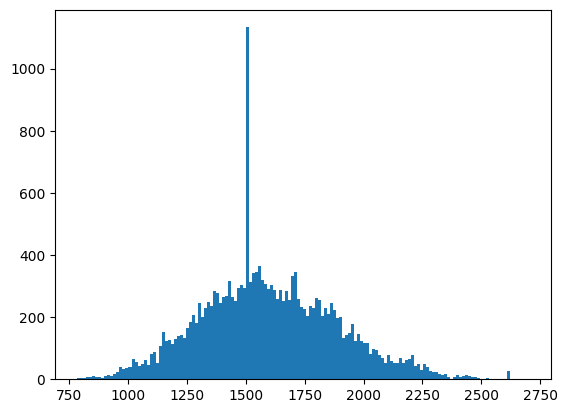

In [ ]:
plt.hist(dd.white_rating, bins=150)
plt.plot()

[]

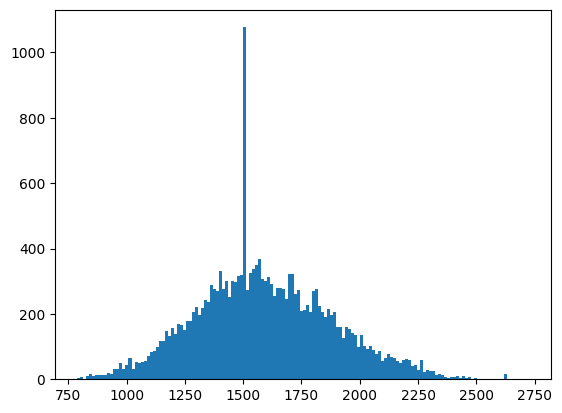

In [ ]:
plt.hist(dd.black_rating, bins=150)
plt.plot()

In [ ]:
print(dd.white_rating.value_counts())
print(dd.black_rating.value_counts())

1500    744
1480     50
1536     44
1708     41
1621     40
       ... 
2475      1
906       1
788       1
1022      1
880       1
Name: white_rating, Length: 1505, dtype: int64
1500    723
1501     51
1810     42
1562     42
1400     41
       ... 
2297      1
1113      1
2293      1
949       1
860       1
Name: black_rating, Length: 1507, dtype: int64


Imamo problem jer se rejting od 1500 pojavljuje previse cesto. Partije u kojima se pojavljuje igrac sa ovim rejtingom cemo da zanemarimo zbog toga sto je to rejting koji lichess automatski dodeljueje svakom igracu prilikom pravljenja naloga. Tu vidimo da nam ti igraci ne znace nista jer nikakve korisne informacije ne mozemo da dobijemo od njih buduci da ne znamo nista o njima. Ti igraci mogu biti i velemajstori, a mogu i biti potpuni pocetnici i bilo sta izmedju.

In [ ]:
rating=dd[dd['white_rating']==1500].index
dd.drop(rating,inplace=True)
rating=dd[dd['black_rating']==1500].index
dd.drop(rating,inplace=True)

In [ ]:
from google.colab import files
dd.to_csv('preprocessed_set.csv') 
files.download('preprocessed_set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dd.victory_status.unique()

array([1, 2, 3, 0])

In [ ]:
from joblib import dump
dump((dd,potezi), 'rezultati_preprocesiranja.joblib')

['rezultati_preprocesiranja.joblib']